# Inércia Térmica

## Cálculo do h p/ convecção natural:

## Materiais:

In [1]:
# material = [ro, k, c]

TijoloFurado = [1200, 0.4, 1000]
TijoloMacico = [2000, 1, 1000]
Pedra = [2000, 2, 1000]
ConcretoCelular = [500, .15, 1300]
Isopor = [100, 0.04, 1000]
Vidro = [2500, 1, 1000]
ChapaMetal = [10000, 80, 500]
AguaEstagnada = [1000, .6, 4200]


## Método explícito:

In [7]:

def TransCal(deltax=.0025, deltat=1, ndias=2, Mat1=Isopor, LMat1=.025, Mat2=TijoloFurado, LMat2=.15, Tini=23):

#variaveis:
    
    t = 0
    segdia = 60*60*24 # s (seg*min*hora)

        #Ambiente:

    G = 0 # W/m2 
    aplha = .3
    qoc = G*aplha #W/m2

    Tar = 1.5802580923*10**(-18)*t**4-3.1142315875*10**(-13)*t**3+1.5580085434*10**(-8)*t**2-4.2320948959*10**(-5)*t+20.367182771 # C
    
    Tint = 23 # C
    Tviz = 23 # C

    Tsupex = Tini # C
    Tsupint = Tini # C
    TMat1Mat2 = Tini # C
    TMat2Mat1 = Tini # C

    hext = 1/.04 # W/m2.K     
    hint = 1/.13 # W/m2.K

    Ee = 0
    Es = 0
    deltaE = 0

    roAr = 1.205 # kg/m3
    cAr = 1005 # J/kg.K
        
        #Geometria:

    Asala = 10 # m2
    Lsala = 10**(1/2) # m
    Vsala = Asala*Lsala # m3


        #Materiais:
    
    roMat1 = Mat1[0] # kg/m3
    kMat1 = Mat1[1] # W/m.K
    cMat1 = Mat1[2] # J/kg.K

    roMat2 = Mat2[0] # kg/m3
    kMat2 = Mat2[1] # W/m.K
    cMat2 = Mat2[2] # J/kg.K
    
    Biext = (hext*deltax)/kMat1
    Biint = (hint*deltax)/kMat2

    FoMat1 = (kMat1*deltat)/(roMat1*cMat1*deltax**2) 
    FoMat2 = (kMat2*deltat)/(roMat2*cMat2*deltax**2)

#calculos:

    #Fo < 0.5 , Fo(1+Bi) < .05

    if FoMat1 >= .5:
        print('FoMat1 > 0.5')

    if FoMat2 >= .5:
        print('FoMat2 > 0.5')

    if FoMat1*(1+Biext) > .5:
        print('FoMat1*(1+Biext) > 0.5')

    if FoMat2*(1+Biint) > .5:
        print('FoMat2*(1+Biint) > 0.5')
        
    nMat1 = int(LMat1/deltax)-2
    nMat2 = int(LMat2/deltax)-2

    '''
    #criando o cabecalho

    cabecalho = []

    par1 = []
    for i in range(nMat1):
        par1.append((i+1)*deltax)

    par2 = []
    for i in range(nMat2):
        par2.append((i+1)*deltax)

    cabecalho.append('t')
    cabecalho.append('qoc')
    cabecalho.append('Tar')
    cabecalho.append('Tsupex')

    for i in par1:
        cabecalho.append(str(i))

    cabecalho.append('TMat1Mat2')
    cabecalho.append('TMat2Mat1')

    for i in par2:
        cabecalho.append(str(i))

    cabecalho.append('Tsupint')
    cabecalho.append('Tint')
    cabecalho.append('Tviz')
    cabecalho.append('Ee')
    cabecalho.append('Es')
    cabecalho.append('deltaE')
    '''

    #Criando linha t0:

    t0 = [t,qoc,Tar,Tsupex]
    
    for i in range(nMat1+2+nMat2):
        t0.append(Tini)
    
    t0.append(Tsupint)    
    t0.append(Tint)
    t0.append(Tviz)

    t0.append(Ee)
    t0.append(Es)
    t0.append(deltaE)

    #criando matriz e adicionando cabecalho e linha t0:

    matriz = []

    '''matriz.append(cabecalho)'''
    matriz.append(t0)

    #inicio da iteracao:

    while t < (ndias*segdia):

        t += deltat

        tdia = (t%segdia) #deixa entre 0 e 24h
        
        G = -1.0717*10**(-6)*tdia**2 + 9.2593*10**(-2)*tdia - 1.5000*10**3

        if G < 0:
            qoc = 0
        else:
            qoc = G*aplha

        Tar = 1.5802580923*10**(-18)*tdia**4-3.1142315875*10**(-13)*tdia**3+1.5580085434*10**(-8)*tdia**2-4.2320948959*10**(-5)*tdia+20.367182771

        Tsupex = (1-2*FoMat1-2*Biext*FoMat1)*t0[3]+2*FoMat1*t0[4]+2*Biext*FoMat1*Tar+2*Biext*FoMat1*qoc/hext

        t1 = [t,qoc,Tar,Tsupex]


        for i in range(nMat1):

            j = 4+i
            Ti = (1-2*FoMat1)*t0[j]+FoMat1*t1[j-1]+FoMat1*t0[j+1]

            t1.append(Ti)

        TMat1Mat2 = (1-2*FoMat1)*t0[len(t1)]+FoMat1*t1[-1]+FoMat2*t0[(len(t1)+1)]
        t1.append(TMat1Mat2)

        TMat2Mat1 = (1-2*FoMat2)*t0[len(t1)]+FoMat1*t1[-1]+FoMat2*t0[(len(t1)+1)]
        t1.append(TMat2Mat1)

        for i in range(nMat2):

            j = 4+nMat1+2+i
            Ti = (1-2*FoMat2)*t0[j]+FoMat2*t0[j-1]+FoMat2*t0[j+1]

            t1.append(Ti)    

        Tsupint = (1-2*FoMat2-2*Biint*FoMat2)*t0[len(t1)]+2*FoMat2*t1[-1]+2*Biint*FoMat2*t0[(len(t1)+1)]
        t1.append(Tsupint)
        
        Tar = (hint*Asala*(Tsupint+5*Tviz)+roAr*Vsala*cAr*t0[len(t1)])/(6*hint*Asala+roAr*cAr*Vsala)
        t1.append(Tar)

        t1.append(Tviz)

        Ee = kMat1*Asala*(t1[3]-t1[4])*deltat/deltax
        Es = kMat1*Asala*(t1[-4]-t1[-3])*deltat/deltax
        deltaE = Ee-Es

        t1.append(Ee)
        t1.append(Es)
        t1.append(deltaE)

        matriz.append(t1)

        t0 = t1  
    
    return matriz, nMat1, nMat2



## Gráficos:

In [25]:
import matplotlib.pyplot as plt
% matplotlib inline

def graficoT(diaini = 2):
    
    #definicao do intervalo analisado:
    
    inianalise = t.index((diaini-1)*60*60*24)
    fimanalise = t.index(inianalise+60*60*24)
    
    #encontrando T maximos e respectivos t's
        
    maxTar = max(Tar[inianalise:fimanalise])
    maxTart = t[(Tar[inianalise:fimanalise].index(maxTar))+inianalise]    
    maxTsupext = max(Tsupext[inianalise:fimanalise])
    maxTsupextt = t[(Tsupext[inianalise:fimanalise].index(maxTsupext))+inianalise]
    maxTsupint = max(Tsupint[inianalise:fimanalise])
    maxTsupintt = t[(Tsupint[inianalise:fimanalise].index(maxTsupint))+inianalise]
    
    #encontrando T minimos
    
    minTar = min(Tar[inianalise:fimanalise])   
    minTsupext = min(Tsupext[inianalise:fimanalise])
    minTsupint = min(Tsupint[inianalise:fimanalise])
    
    #adiconando dados ao gráfico
    
    plt.plot(maxTart,maxTar,'ro')
    plt.plot(maxTsupextt,maxTsupext,'ro')
    plt.plot(maxTsupintt,maxTsupint,'ro')
    
    plt.plot(t,Tar, label= 'Tar')
    plt.plot(t,Tsupext, label= 'Tsupext')
    plt.plot(t,Tsupint, label= 'Tsupint')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.ylim((minTar-2),(maxTsupext+2))
    plt.xlabel('t (s)')
    plt.ylabel('T (C)')    
    plt.show()
    
    # definindo dados de saida
    
    fatamor = (maxTsupext-minTsupext)-(maxTsupint-minTsupint)
    
    print('Tar máximo:',"%.2f" %  maxTar,'C')
    print('Tsupext máximo:',"%.2f" %  maxTsupext,'C')
    print('Tsupint máximo:',"%.2f" %  maxTsupint,'C')
    print('Atraso témico:',(maxTsupintt-maxTsupextt)//3600,'h',((maxTsupintt-maxTsupextt)%3600)//60,'min')
    print('Fator de amortecimento:',"%.2f" % fatamor)

''' '''

def graficoq(diaini = 2):
        
    #definicao do intervalo analisado:
    
    inianalise = t.index((diaini-1)*60*60*24)
    fimanalise = t.index(inianalise+60*60*24)
    
    plt.plot(t[1000:],Ee[1000:], label= 'Ee')
    plt.plot(t[1000:],Es[1000:], label= 'Es')
    #plt.plot(t,G)
    
    #plt.plot(t,Edelta, label= 'deltaE')
    plt.axhline(y=0)
    #plt.axvline(x=(diaini-1)*3600*24)
    plt.xlim(inianalise,fimanalise)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel('t (s)')
    plt.ylabel('E (J)')    
    plt.show()

## Seleção dos dados:

In [32]:
dados = TransCal(deltax=0.01, Mat1=Isopor,LMat1=.020,Mat2=ChapaMetal, LMat2=.03, ndias=5,Tini=20)

#criando vetores para o grafico:
t = []
Tar = []
Tsupext = []
Tsupint = []
Ee = []
Es = []
Edelta = []
G =[]

#adicionando os dados nos vetores:
for linha in dados[0]:

    t.append(linha[0])
    Tar.append(linha[2])
    Tsupext.append(linha[3])
    Tsupint.append(linha[(4+dados[1]+2+dados[2])])
    Ee.append(linha[-3])
    Es.append(linha[-2])
    Edelta.append(linha[-1])
    G.append(linha[1])

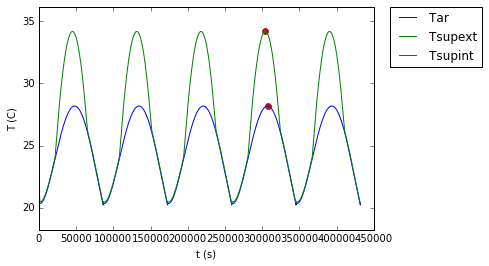

Tar máximo: 28.18 C
Tsupext máximo: 34.18 C
Tsupint máximo: 0.93 C
Atraso témico: 0 h 4 min
Fator de amortecimento: 13.49


In [33]:
graficoT(diaini=4)

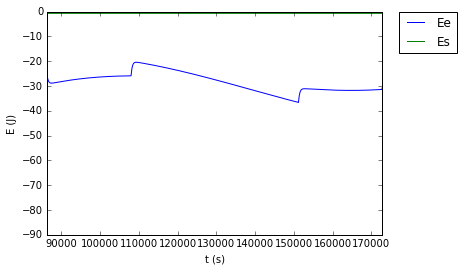

In [34]:
graficoq()